# Reinforcement Learning Environments and Algorithms

## Environments

1. **Taxi Environment** ✅
2. **PAC-MAN Game**   ❌   not possible  (build dependencies has conflicts)
3. **Atari Games**    ❌   not possible  (req : actor critic method, etc.)
4. **Balancing the Cartpole Model** ✅
5. **Grid World** ✅ (here we use FrozenLake-v1)

## Definitions

- **State Space**: The set of all possible states that an agent can be in while interacting with the environment. Each state is a representation of the environment at a given time.

- **Action Space**: The set of all possible actions that an agent can take in each state. Actions can be discrete (a finite number of options) or continuous (any value within a range).

## Environment Overview

| Environment      | State Space | Action Space   |
|------------------|-------------|----------------|
| Grid World       | Discrete    | Discrete       |
| Taxi-v3          | Discrete    | Discrete       |
| Atari Games      | Continuous  | Continuous     |
| Mspacman-v4      | Continuous  | Discrete       |
| CartPole-v1      | Continuous  | Discrete       |


## Algorithms

1. **Value Iteration & Policy Iteration**
2. **TD(0) Algorithm  &  TD(λ) Algorithm**
3. **Q-Learning Algorithm**
4. **Deep Q-Network (DQN)**
5. **Dueling Deep Q-Network (Dueling DQN)**

| Algorithm                            | State Space                                  |
|--------------------------------------|----------------------------------------------|
| Value Iteration                      | Discrete                                     |
| Policy Iteration                     | Discrete                                     |
| TD(0)  &  TD(λ)                                | Discrete/Continuous (with approximation)     |
| Q-Learning                           | Discrete                                     |
| Deep Q-Network (DQN)                | Discrete actions, Continuous states          |
| Dueling Deep Q-Network (Dueling DQN) | Discrete actions, Continuous states          |

### Notes

- **DQN** and **DDQN** are primarily designed for environments with **discrete action spaces** but can handle **continuous state spaces**.
- For environments with **continuous action spaces**, consider using algorithms like **DDPG** (Deep Deterministic Policy Gradient) or **PPO** (Proximal Policy Optimization) for better performance.


First let us ignore warning to get clean output without any warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Lets try each of the algorithm one by one ...



---


## Value Iteration

**Suitable for:**

 * Discrete state and action spaces.

**Why:**  
* These algorithms are dynamic programming methods and rely on iterating over all states and actions to find the optimal policy. This requires a finite (discrete) set of states and actions, as iterating over a continuous space would be computationally infeasible.

**Environments used:**

1.   'FrozenLake-v1'


      example usage:

      env = gym.make('FrozenLake-v1', is_slippery = False)

2.  'Taxi-v3'

    
      example  usage:

      env = gym.make('Taxi-v3')

In [ ]:
import numpy as np
import gym

# Initialize the Grid World (FrozenLake) environment
env = gym.make('FrozenLake-v1', is_slippery=False)

# For using Taxi environment
# env = gym.make('Taxi-v3')



def value_iteration(env, gamma=0.99, theta=1e-8):
    value_table = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for state in range(env.observation_space.n):
            # Skip terminal states
            if env.env.P[state] == {}:
                continue

            q_values = []
            for action in range(env.action_space.n):
                q_value = 0
                for prob, next_state, reward, done in env.env.P[state][action]:
                    q_value += prob * (reward + gamma * value_table[next_state])
                q_values.append(q_value)

            # Update the value function with the max Q-value for this state
            max_value = max(q_values)
            delta = max(delta, np.abs(max_value - value_table[state]))
            value_table[state] = max_value

        if delta < theta:
            break
    return value_table

# Run value iteration
optimal_values = value_iteration(env)
print("Optimal Value Function:")
print(optimal_values)


Optimal Value Function:
[0.95099005 0.96059601 0.970299   0.96059601 0.96059601 0.
 0.9801     0.         0.970299   0.9801     0.99       0.
 0.         0.99       1.         0.        ]


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(




---


## Policy Iteration

**Suitable for:**

* Discrete state and action spaces.

**Why:**  

* These algorithms are dynamic programming methods and rely on iterating over all states and actions to find the optimal policy. This requires a finite (discrete) set of states and actions, as iterating over a continuous space would be computationally infeasible.

**Environments used:**

1.   'FrozenLake-v1'


      example usage:

      env = gym.make('FrozenLake-v1', is_slippery = False)

2.  'Taxi-v3'

    
      example  usage:

      env = gym.make('Taxi-v3')

In [ ]:
import numpy as np
import gym

env = gym.make('FrozenLake-v1', is_slippery=False)

# For using taxi Environment
# env = gym.make('Taxi-v3')




def policy_evaluation(policy, env, gamma=0.99, theta=1e-8):
    value_table = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for state in range(env.observation_space.n):
            v = sum([prob * (reward + gamma * value_table[next_state])
                     for prob, next_state, reward, _ in env.env.P[state][policy[state]]])
            delta = max(delta, np.abs(v - value_table[state]))
            value_table[state] = v
        if delta < theta:
            break
    return value_table

def policy_improvement(value_table, env, gamma=0.99):
    return np.array([np.argmax([sum([prob * (reward + gamma * value_table[next_state])
                         for prob, next_state, reward, _ in env.env.P[state][action]])
                         for action in range(env.action_space.n)])
                     for state in range(env.observation_space.n)])

def policy_iteration(env, gamma=0.99):
    policy = np.zeros(env.observation_space.n, dtype=int)
    while True:
        value_table = policy_evaluation(policy, env, gamma)
        new_policy = policy_improvement(value_table, env, gamma)
        if np.all(policy == new_policy):
            break
        policy = new_policy
    return policy

# Run policy iteration
optimal_policy = policy_iteration(env)
print("Optimal Policy:")
print(optimal_policy)


Optimal Policy:
[1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




---


## Temporal Difference :: TD(0)

**Suitable for:**

*  Discrete and continuous state spaces.

**Why:**

*  TD(0) can be applied in both types of state spaces. For continuous state spaces, function approximators like neural networks are often used to estimate the value function. For discrete state spaces, tables are typically used.

**Action space:**

*  Usually discrete, but it can also work with continuous actions if combined with a function approximator.

In [ ]:
import numpy as np
import gym

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# For Gridworld (FrozenLake-v1) use ::
# env = gym.make('FrozenLake-v1', is_slippery = False)



def td_zero(env, num_episodes=1000, alpha=0.1, gamma=0.99):
    value_table = np.zeros(env.observation_space.n)

    for _ in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action = env.action_space.sample()  # Choose a random action
            next_state, reward, done, _ = env.step(action)

            # TD(0) update rule
            value_table[state] += alpha * (reward + gamma * value_table[next_state] - value_table[state])

            state = next_state

    return value_table

# Learn the value function using TD(0)
optimal_values = td_zero(env)
print("Optimal Value Function (TD(0)):")
print(optimal_values)


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Optimal Value Function (TD(0)):
[   0.         -122.1310675   -99.16534024 -126.6457215  -127.27260571
    0.         -178.19115097 -169.49681443 -163.57250036 -139.55338661
    0.         -158.51945695 -183.74125988 -188.68065199 -168.00681862
    0.           -9.51976999 -114.69977424  -72.58169631  -87.97208072
    0.         -142.1427779  -110.34875091 -139.89316173 -130.95771106
    0.         -174.18849971 -173.43742514 -162.4389328  -143.53669402
    0.         -161.27237471 -191.45730571 -183.55806484 -171.17871388
    0.          -27.49191971 -111.51993701  -64.47406481  -83.99808734
    0.         -149.29231493 -152.29111088 -164.15301504 -119.02622329
    0.         -148.78313979 -129.0700511  -162.84295268 -147.62668261
    0.         -184.41005108 -164.01215257 -143.45719812 -155.63957661
    0.          -85.79765805  -65.62584502  -93.28031765  -53.95842153
    0.         -152.46429119 -152.68695531 -164.43215056 -114.43690364
    0.         -142.50268407 -131.31079937 -1



---


## Temporal Difference :: TD(λ)

In [ ]:
import numpy as np
import gym

# Initialize environment
env = gym.make('Taxi-v3')

# For Gridworld (FrozenLake-v1) use ::
# env = gym.make('FrozenLake-v1', is_slippery = False)




def td_lambda(env, num_episodes=1000, alpha=0.1, gamma=0.99, lam=0.9):
    V = np.zeros(env.observation_space.n)  # Value function
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        e = np.zeros(env.observation_space.n)  # Eligibility traces

        while not done:
            action = env.action_space.sample()  # Replace with policy (e.g., ε-greedy)
            next_state, reward, done, _ = env.step(action)

            # TD error
            delta = reward + gamma * V[next_state] - V[state]

            # Update eligibility traces
            e[state] += 1

            # Update value function for all states
            for s in range(env.observation_space.n):
                V[s] += alpha * delta * e[s]
                e[s] *= gamma * lam  # Decay eligibility traces

            state = next_state

    return V

optimal_value_function = td_lambda(env)
print("Optimal Value Function:")
print(optimal_value_function)

Optimal Value Function:
[   0.         -289.37130813 -296.6167946  -324.60064533 -347.81614112
    0.         -346.44759412 -342.57725068 -339.82728778 -343.26785089
    0.         -359.00522933 -364.43727757 -357.11351886 -348.8877036
    0.          -87.0107805  -278.26514854 -285.07609349 -309.11655305
    0.         -285.97297592 -308.71819242 -338.16695768 -346.75389906
    0.         -343.95981975 -338.62756311 -350.9314841  -341.08189015
    0.         -365.52795888 -364.84607268 -355.86783926 -356.23753877
    0.         -158.85796262 -286.45899607 -267.8250519  -306.01366984
    0.         -344.74177851 -350.34509668 -359.22232797 -331.11133898
    0.         -328.19334199 -305.97379679 -363.33293013 -361.57682514
    0.         -362.92058931 -357.22420693 -343.96964249 -348.58328552
    0.         -261.71517831 -172.4941025  -267.41188448 -258.96632586
    0.         -343.06876734 -360.51043058 -357.99751075 -330.68507859
    0.         -318.21755106 -295.16255221 -356.123784



---


## Q - Learning

**Suitable for:**

* Discrete state and action spaces.

**Why:**

* The original Q-learning algorithm maintains a table of state-action values (Q-table), which is only feasible for discrete spaces. For continuous spaces, a function approximator is needed to handle the infinite possibilities.

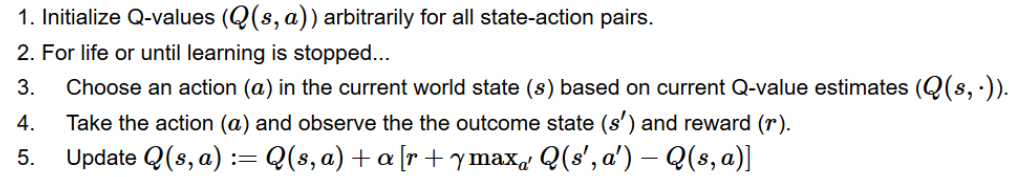

**Environments used:**

1.   'FrozenLake-v1'


      example usage:

      env = gym.make('FrozenLake-v1', is_slippery = False)

2.  'Taxi-v3'

    
      example  usage:

      env = gym.make('Taxi-v3')



---


Now implementing Taxi-v3

In [ ]:
import numpy as np
import gym

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

def q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # Choose action with epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(q_table[state])  # Exploit: best action

            next_state, reward, done, _ = env.step(action)

            # Q-Learning update rule
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            state = next_state

    return q_table

# Learn the Q-table using Q-Learning
q_table = q_learning(env)
print("Learned Q-Table:")
print(q_table)


Learned Q-Table:
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.89067107 -2.76465135 -3.97193121 -3.79522994  3.96868304 -6.56502528]
 [-2.15263778  0.32672489 -2.2948073  -2.1677923  13.6188802  -2.33287541]
 ...
 [-1.19342195 -1.05159978 -1.19342195 -1.18448811 -1.9499569  -1.999     ]
 [-2.07347583 -2.06090491 -2.07837586 -2.11319978 -2.97594004 -3.85686841]
 [-0.1999     -0.1999     -0.1999      2.04757995 -1.         -1.        ]]




---


Now implementing FrozenLake-v1

In [ ]:
import numpy as np
import gym
import random

# Initialize the FrozenLake environment
env = gym.make('FrozenLake-v1')

def q_learning(env, num_episodes=15000, alpha=0.8, gamma=0.95, epsilon=1.0, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.005):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_rewards = 0

        while not done:
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(q_table[state])  # Exploit: best action

            # Take the action and observe the outcome
            next_state, reward, done, _= env.step(action)

            # Q-Learning update rule
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            state = next_state
            total_rewards += reward

        # Decay epsilon for exploration-exploitation tradeoff
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        rewards.append(total_rewards)

    return q_table, rewards

# Run Q-Learning on the FrozenLake environment
q_table, rewards = q_learning(env)
print("Learned Q-Table:")
print(q_table)

# Print the average score over all episodes
print("Average score over time: ", sum(rewards) / len(rewards))


Score over time: 0.4894
[[4.81666038e-01 1.98397508e-02 1.35889388e-01 2.03664970e-02]
 [9.59859917e-03 1.79042691e-01 9.14526707e-03 1.69985207e-02]
 [3.45330020e-03 3.15708968e-03 1.06167450e-01 1.65443983e-02]
 [3.43059295e-03 1.29888803e-02 8.95514357e-05 9.93467736e-02]
 [6.39147873e-01 5.57892964e-02 7.95598731e-02 1.83557931e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.44560735e-01 2.64449250e-09 2.12815737e-06 1.40331902e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.36544514e-02 6.69562066e-03 1.25737928e-02 6.80646738e-01]
 [2.08667553e-02 4.12214982e-01 8.86886435e-03 7.45384462e-03]
 [7.19000319e-01 1.71143317e-03 2.37440768e-03 2.90891221e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.90058131e-02 1.39644643e-01 7.93119325e-01 6.06001188e-02]
 [1.67490276e-01 4.26128138e-01 9.66963411e-01 2.07554357e-01]
 [0.00000000e+00 0.00000000e+00



---


## Deep Q- Learning

**Suitable for:**

* Continuous state spaces and discrete action spaces.

**Why:**

* DQN uses a neural network to approximate the Q-values for a continuous state space, but the action space needs to remain discrete. It's commonly applied in environments like Atari games, where the action space is discrete but the state space is high-dimensional (e.g., pixels).

In [ ]:
import numpy as np
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Define the neural network model
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 16)  # Reduced size for speed
        self.fc2 = nn.Linear(16, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Hyperparameters
gamma = 0.99
alpha = 0.001
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 32  # Reduced batch size
memory_size = 5000  # Smaller memory
memory = []  # Simple list instead of deque

# Initialize the environment and DQN model
env = gym.make('CartPole-v1')

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
q_network = DQN(state_size, action_size).to(device)
target_network = DQN(state_size, action_size).to(device)
target_network.load_state_dict(q_network.state_dict())
optimizer = optim.Adam(q_network.parameters(), lr=alpha)

# Function to select action
def select_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()
    state = torch.FloatTensor(state).unsqueeze(0).to(device)
    with torch.no_grad():
        return torch.argmax(q_network(state)).item()

# Function to train the Q-network
def train():
    if len(memory) < batch_size:
        return
    batch = random.sample(memory, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = torch.FloatTensor(np.array(states)).to(device)
    actions = torch.LongTensor(actions).unsqueeze(1).to(device)
    rewards = torch.FloatTensor(rewards).unsqueeze(1).to(device)
    next_states = torch.FloatTensor(np.array(next_states)).to(device)
    dones = torch.FloatTensor(dones).unsqueeze(1).to(device)

    q_values = q_network(states).gather(1, actions)
    next_q_values = target_network(next_states).max(1)[0].unsqueeze(1)
    target = rewards + (gamma * next_q_values * (1 - dones))

    loss = nn.MSELoss()(q_values, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Main training loop
num_episodes = 300  # Reduced episodes for faster runs
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = select_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        memory.append((state, action, reward, next_state, done))
        if len(memory) > memory_size:
            memory.pop(0)
        state = next_state
        total_reward += reward

        train()

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    if episode % 10 == 0:
        target_network.load_state_dict(q_network.state_dict())

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon:.4f}")

env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 50, Reward: 14.0, Epsilon: 0.7783
Episode 100, Reward: 43.0, Epsilon: 0.6058
Episode 150, Reward: 67.0, Epsilon: 0.4715
Episode 200, Reward: 174.0, Epsilon: 0.3670
Episode 250, Reward: 198.0, Epsilon: 0.2856
Episode 300, Reward: 206.0, Epsilon: 0.2223




---


## Dueling Deep Q-Networks

**Suitable for:**

* Continuous state spaces and discrete action spaces.

**Why:**

* Similar to DQN, Dueling DQN improves the value approximation by splitting the Q-value into a value function (how good it is to be in a given state) and an advantage function (how beneficial a particular action is compared to others). It also requires a discrete action space but can handle continuous states with neural networks.

In [ ]:
import numpy as np
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the Dueling DQN model
class DuelingDQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc_value = nn.Linear(128, 64)
        self.fc_advantage = nn.Linear(128, 64)
        self.value = nn.Linear(64, 1)
        self.advantage = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))

        # Split into Value and Advantage streams
        value = torch.relu(self.fc_value(x))
        advantage = torch.relu(self.fc_advantage(x))

        value = self.value(value)
        advantage = self.advantage(advantage)

        # Combine the streams to get the final Q-values
        q_values = value + (advantage - advantage.mean())
        return q_values

# Hyperparameters
gamma = 0.99
alpha = 0.001  # Learning rate
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 64
memory_size = 10000

# Experience Replay Memory
memory = deque(maxlen=memory_size)

# Select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the environment and Dueling DQN model
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Initialize the Q-network and target network
q_network = DuelingDQN(state_size, action_size).to(device)
target_network = DuelingDQN(state_size, action_size).to(device)
target_network.load_state_dict(q_network.state_dict())
optimizer = optim.Adam(q_network.parameters(), lr=alpha)

# Function to select action
def select_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()  # Explore: random action
    state = torch.FloatTensor(state).unsqueeze(0).to(device)
    with torch.no_grad():
        q_values = q_network(state)
    return torch.argmax(q_values).item()  # Exploit: choose the best action

# Function to store experience in replay memory
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

# Function to train the Q-network
def train():
    if len(memory) < batch_size:
        return

    batch = random.sample(memory, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = torch.FloatTensor(states).to(device)
    actions = torch.LongTensor(actions).unsqueeze(1).to(device)
    rewards = torch.FloatTensor(rewards).unsqueeze(1).to(device)
    next_states = torch.FloatTensor(next_states).to(device)
    dones = torch.FloatTensor(dones).unsqueeze(1).to(device)

    q_values = q_network(states).gather(1, actions)
    next_q_values = target_network(next_states).max(1)[0].unsqueeze(1)

    target = rewards + (gamma * next_q_values * (1 - dones))

    loss = nn.MSELoss()(q_values, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Main training loop
num_episodes = 500
target_update_freq = 10

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = select_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        store_experience(state, action, reward, next_state, done)
        state = next_state

        train()

    # Decay epsilon for exploration-exploitation tradeoff
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Update target network
    if episode % target_update_freq == 0:
        target_network.load_state_dict(q_network.state_dict())

    print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

# Evaluation of the trained agent
num_eval_episodes = 10
total_eval_reward = 0

for _ in range(num_eval_episodes):
    state = env.reset()
    done = False
    while not done:
        action = select_action(state, 0)  # Set epsilon to 0 for evaluation
        next_state, reward, done, _ = env.step(action)
        total_eval_reward += reward
        state = next_state

average_eval_reward = total_eval_reward / num_eval_episodes
print(f"Average Reward over {num_eval_episodes} evaluation episodes: {average_eval_reward:.2f}")

env.close()


Episode 1/500, Total Reward: 17.0, Epsilon: 0.9950
Episode 2/500, Total Reward: 13.0, Epsilon: 0.9900
Episode 3/500, Total Reward: 21.0, Epsilon: 0.9851
Episode 4/500, Total Reward: 26.0, Epsilon: 0.9801
Episode 5/500, Total Reward: 15.0, Epsilon: 0.9752
Episode 6/500, Total Reward: 18.0, Epsilon: 0.9704
Episode 7/500, Total Reward: 56.0, Epsilon: 0.9655
Episode 8/500, Total Reward: 12.0, Epsilon: 0.9607
Episode 9/500, Total Reward: 21.0, Epsilon: 0.9559
Episode 10/500, Total Reward: 23.0, Epsilon: 0.9511
Episode 11/500, Total Reward: 24.0, Epsilon: 0.9464
Episode 12/500, Total Reward: 11.0, Epsilon: 0.9416
Episode 13/500, Total Reward: 17.0, Epsilon: 0.9369
Episode 14/500, Total Reward: 15.0, Epsilon: 0.9322
Episode 15/500, Total Reward: 27.0, Epsilon: 0.9276
Episode 16/500, Total Reward: 24.0, Epsilon: 0.9229
Episode 17/500, Total Reward: 14.0, Epsilon: 0.9183
Episode 18/500, Total Reward: 17.0, Epsilon: 0.9137
Episode 19/500, Total Reward: 29.0, Epsilon: 0.9092
Episode 20/500, Total

# List of gym environments

In [ ]:
# Print the key registries for gym environments
envs = gym.envs.registry.all()
env_list = [env.id for env in envs]
print(env_list)


['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4']


## **Discrete Environments**


---



| Environment                  | Version                        | State Space | Action Space  |
|------------------------------|--------------------------------|-------------|---------------|
| CartPole                     | CartPole-v0                   | Discrete    | Discrete      |
|                              | CartPole-v1                   | Discrete    | Discrete      |
| Mountain Car                 | MountainCar-v0                | Discrete    | Discrete      |
| Taxi                         | Taxi-v3                       | Discrete    | Discrete      |
| Blackjack                    | Blackjack-v1                  | Discrete    | Discrete      |
| Frozen Lake                  | FrozenLake-v1                 | Discrete    | Discrete      |
|                              | FrozenLake8x8-v1              | Discrete    | Discrete      |
| Cliff Walking                | CliffWalking-v0               | Discrete    | Discrete      |
| Reacher                      | Reacher-v2                    | Continuous  | Discrete      |
|                              | Reacher-v4                    | Continuous  | Discrete      |




---



## **Continuous Environments**



---



| Environment                  | Version                        | State Space | Action Space  |
|------------------------------|--------------------------------|-------------|---------------|
| Bipedal Walker               | BipedalWalker-v3              | Continuous  | Continuous    |
|                              | BipedalWalkerHardcore-v3      | Continuous  | Continuous    |
| Car Racing                   | CarRacing-v2                  | Continuous  | Continuous    |
| Pusher                       | Pusher-v2                     | Continuous  | Continuous    |
|                              | Pusher-v4                     | Continuous  | Continuous    |
| Inverted Pendulum            | InvertedPendulum-v2           | Continuous  | Continuous    |
|                              | InvertedPendulum-v4           | Continuous  | Continuous    |
| Inverted Double Pendulum     | InvertedDoublePendulum-v2     | Continuous  | Continuous    |
|                              | InvertedDoublePendulum-v4     | Continuous  | Continuous    |
| Half Cheetah                | HalfCheetah-v2                | Continuous  | Continuous    |
|                              | HalfCheetah-v3                | Continuous  | Continuous    |
|                              | HalfCheetah-v4                | Continuous  | Continuous    |
| Hopper                       | Hopper-v2                     | Continuous  | Continuous    |
|                              | Hopper-v3                     | Continuous  | Continuous    |
|                              | Hopper-v4                     | Continuous  | Continuous    |
| Swimmer                      | Swimmer-v2                    | Continuous  | Continuous    |
|                              | Swimmer-v3                    | Continuous  | Continuous    |
|                              | Swimmer-v4                    | Continuous  | Continuous    |
| Walker                       | Walker2d-v2                   | Continuous  | Continuous    |
|                              | Walker2d-v3                   | Continuous  | Continuous    |
|                              | Walker2d-v4                   | Continuous  | Continuous    |
| Ant                          | Ant-v2                        | Continuous  | Continuous    |
|                              | Ant-v3                        | Continuous  | Continuous    |
|                              | Ant-v4                        | Continuous  | Continuous    |
| Humanoid                     | Humanoid-v2                   | Continuous  | Continuous    |
|                              | Humanoid-v3                   | Continuous  | Continuous    |
|                              | Humanoid-v4                   | Continuous  | Continuous    |
| Humanoid Standup             | HumanoidStandup-v2            | Continuous  | Continuous    |
|                              | HumanoidStandup-v4            | Continuous  | Continuous    |




---

